In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm
# Initialize Plotly in Jupyter Notebook mode
import plotly.io as pio

In [3]:
df = pd.read_csv("superstore_sales.csv")

In [396]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Abbreviation
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,KY
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,KY
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,CA
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,FL
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,FL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

The above data does have some irregularities, but data like Postal_code and dates are of no use to us.
Therefore, we won't be making any changes in these columns and keep it untouched.
**********************************************************************************************************
All other columns are perfect for our use.
----------------------------------------------------------------------------------------------------------

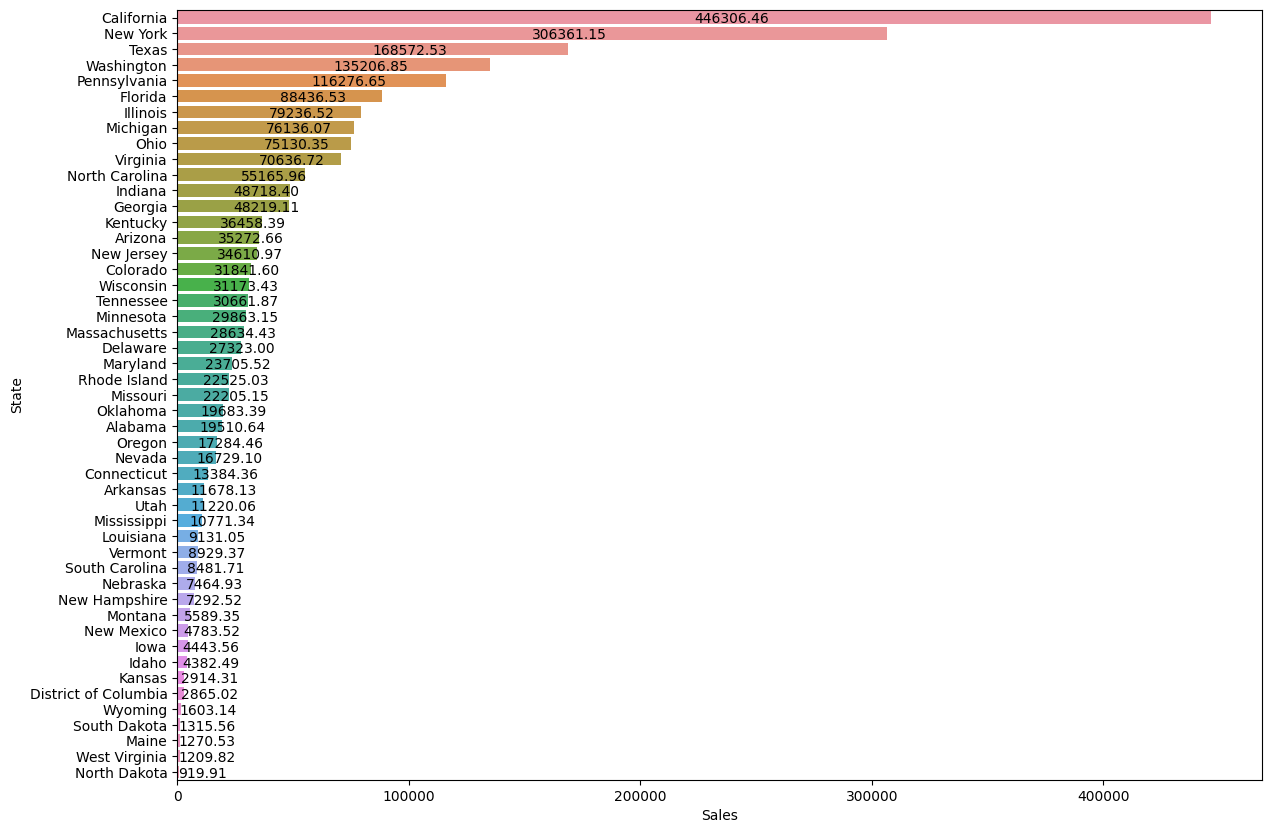

In [354]:
Per_state_sales = df.groupby("State")['Sales'].sum().reset_index()
plt.figure(figsize=(14,10))
Per_state_sales = Per_state_sales.sort_values(by='Sales', ascending = False)
ax = sns.barplot(x = 'Sales', y = 'State', data = Per_state_sales, orient='h')

# Add the values on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2, f'{p.get_width():.2f}', ha='left', va='center_baseline')

plt.show()


---------------------------------------------------------------------------------------------
Now, we will display the above data on a Map, which will provide us a 
better visual understanding of total sales in the US.
---------------------------------------------------------------------------------------------



In [341]:
#Calculating the unique values of 'State' column
df['State'].nunique()

49

There are 49 unique states listed in our data.
So, we will use only those states for our project and include them in our visualisations.
------------------------

In [331]:
# Create a mapping for all 49 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska":"AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA",  "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

In [345]:
# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

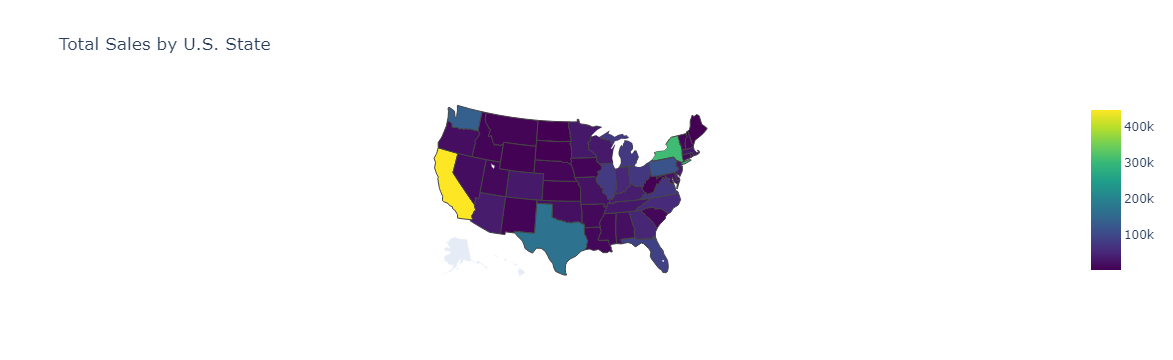

In [493]:
# Create a choropleth map using Plotly
"""
   ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
"""

fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True, colorscale="viridis")
               )
fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

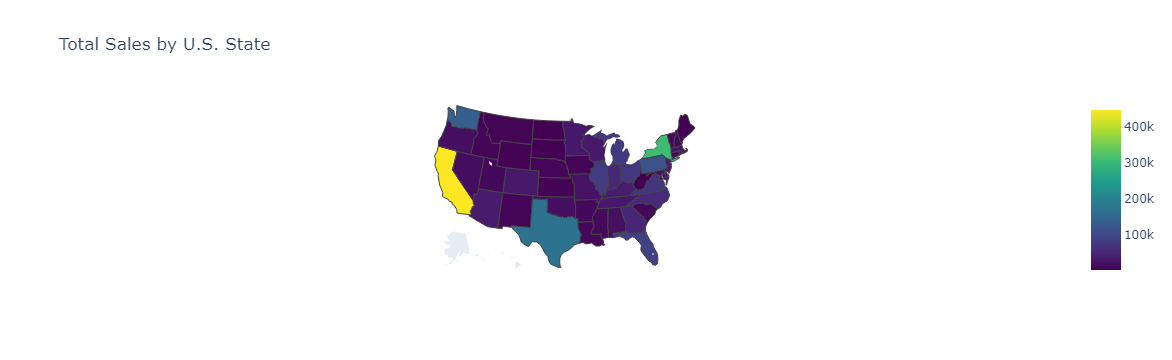

From this Map we can clearly see the difference in the level of sales across different states.

In conclusion, California has the highest sales and is therefore marked with the warmest color in the palette(Yellow)
Followed by California, we have New York, which is majorly due to the New York City andneighbouring cities. 

All other states that have the less sales, are marked in a more cooler color form the palette.

************************************************************************************************************

As we have a closer look at this data, we can see that only a couple of states exceed a certain mark of Total sales. 
And there is very less contrast in the amount sales throughout the US. 

We can use the describe function and eventually plot a boxplot, to study how skewed the sales data is.
-----------------------------

In [246]:
sum_of_sales.describe()

,Sales
count,49.000000
mean,46153.811892
std,79088.812263
min,919.910000
25%,7464.930000
50%,22205.150000
75%,48219.110000
max,446306.463500


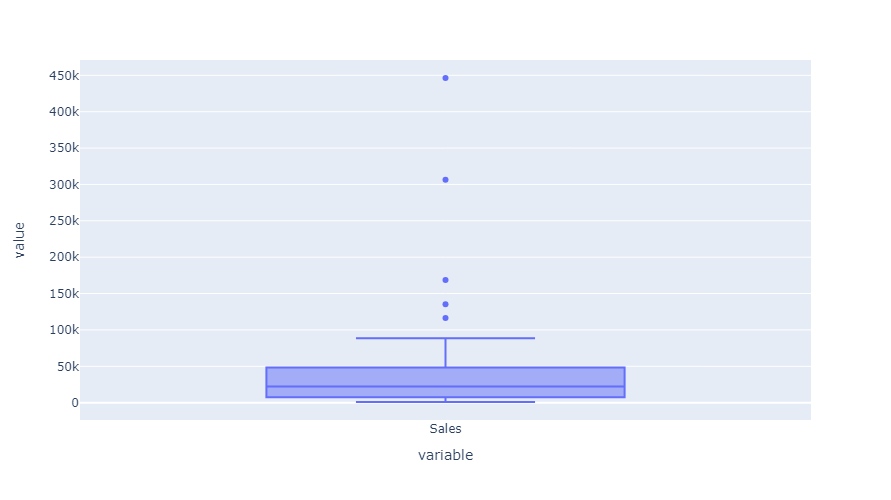

In [272]:
fig = px.box(sum_of_sales['Sales'])
fig.update_layout(width=450, height=500, autosize=True)
fig.show()

This boxplot clearly indicates skewness in our data, as our plot is clustered on one side.
The max value is on the far top which severely affects our data distribution.
_______________________________________________________________________________________________________

Next, to get an overview of all the categorical data, we will create some basic barplots.
--------------

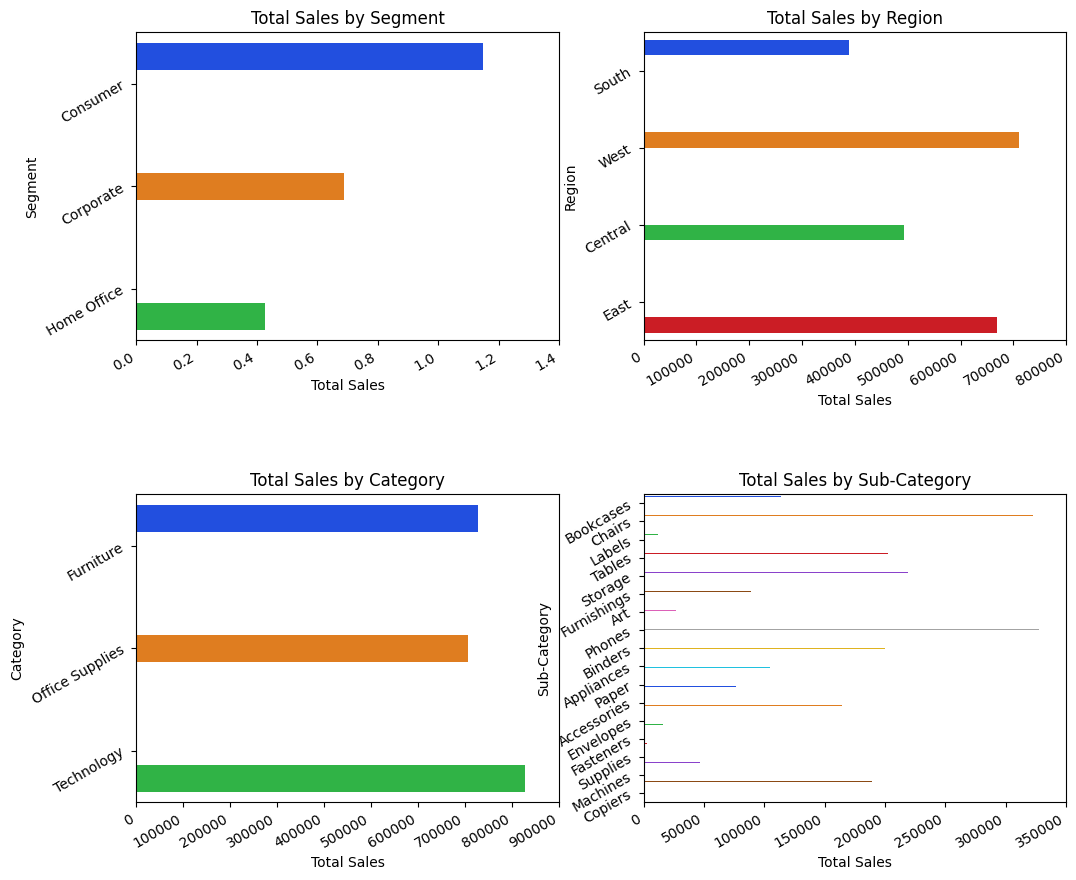

In [388]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

columns = ['Segment', 'Region', 'Category', 'Sub-Category']

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.barplot(x='Sales', y=column, data=df, estimator=np.sum, errorbar=None, palette='bright', ax=ax, hue=column)
    ax.set_xlabel('Total Sales')
    ax.set_title(f'Total Sales by {column}')
    ax.set_xticks(ax.get_xticks())  # Set ticks before setting labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    ax.set_yticks(ax.get_yticks())  # Set ticks before setting labels
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha='right')
    ax.legend().remove()  # Remove legend

plt.show()

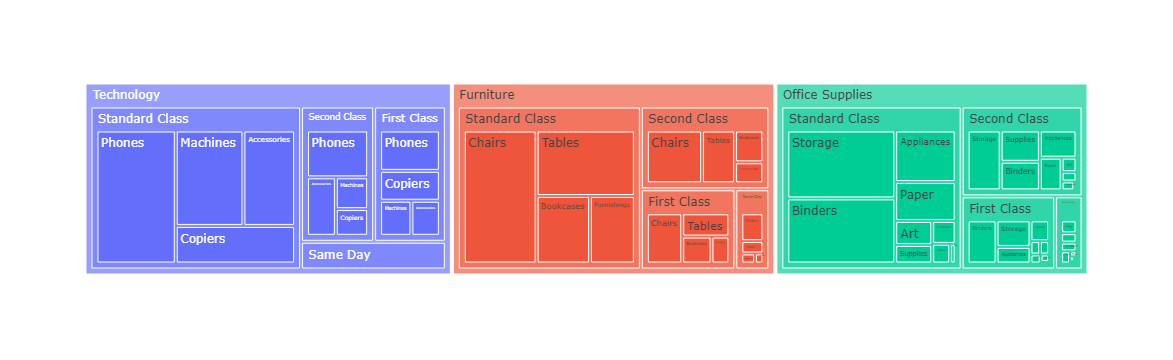

In [390]:
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

#Create a treemap
fig = px.treemap(df_summary, path=['Category', 'Ship Mode', 'Sub-Category'], values='Sales')

fig.show()

*************************************************************************************************************************************
Now, we will display Sales on Monthly basis.
To do so, we will only need month and year component form the Order Date.
So we will extract month and year and create their seperate column initially
Then we will create an new column containing both month and year as one, for displaying.


In [412]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format= '%d-%m-%Y')
df['Month'] = df['Order Date'].dt.month

In [418]:
df['Year'] = df['Order Date'].dt.year

In [422]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

In [431]:
df.groupby('Date')['Sales'].sum()

Date
2015-01-01     14205.7070
2015-02-01      4519.8920
2015-03-01     55205.7970
2015-04-01     27906.8550
2015-05-01     23644.3030
2015-06-01     34322.9356
2015-07-01     33781.5430
2015-08-01     27117.5365
2015-09-01     81623.5268
2015-10-01     31453.3930
2015-11-01     77907.6607
2015-12-01     68167.0585
2016-01-01     18066.9576
2016-02-01     11951.4110
2016-03-01     32339.3184
2016-04-01     34154.4685
2016-05-01     29959.5305
2016-06-01     23599.3740
2016-07-01     28608.2590
2016-08-01     36818.3422
2016-09-01     63133.6060
2016-10-01     31011.7375
2016-11-01     75249.3995
2016-12-01     74543.6012
2017-01-01     18542.4910
2017-02-01     22978.8150
2017-03-01     51165.0590
2017-04-01     38679.7670
2017-05-01     56656.9080
2017-06-01     39724.4860
2017-07-01     38320.7830
2017-08-01     30542.2003
2017-09-01     69193.3909
2017-10-01     59583.0330
2017-11-01     79066.4958
2017-12-01     95739.1210
2018-01-01     43476.4740
2018-02-01     19920.9974
2018-03

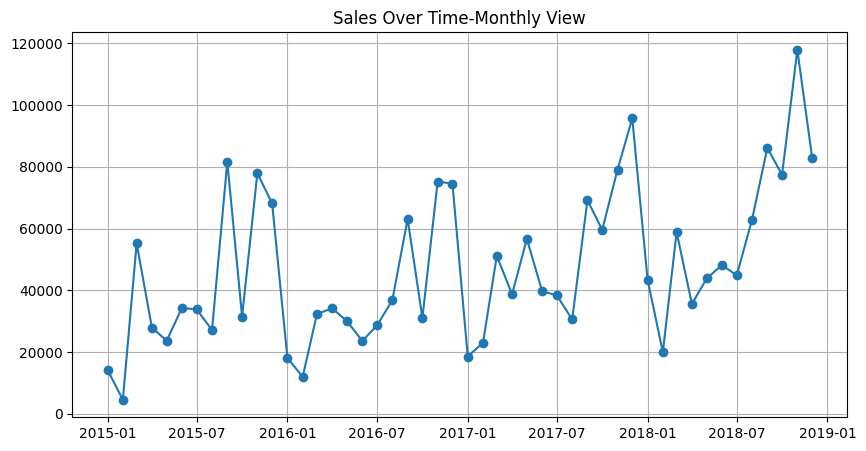

In [424]:
# Group by date and calculate the sum od sales
df_datewise_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(df_datewise_sales['Date'], df_datewise_sales['Sales'], marker='o', linestyle='-')
plt.xlabel= ('Date')
plt.ylabel = ('Sales')
plt.title('Sales Over Time-Monthly View')
plt.grid(True)
plt.show()

Revenue Based Product Overview
-------------------------------

In [595]:
#group sales data based on subcategory
prod_rev = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).round(0)

In [597]:
prod_rev

Sub-Category
Phones         327782.0
Chairs         322823.0
Storage        219343.0
Tables         202811.0
Binders        200029.0
Machines       189239.0
Accessories    164187.0
Copiers        146248.0
Bookcases      113813.0
Appliances     104618.0
Furnishings     89212.0
Paper           76828.0
Supplies        46420.0
Art             26705.0
Envelopes       16128.0
Labels          12348.0
Fasteners        3002.0
Name: Sales, dtype: float64

In [621]:
#Now, if we try to print all the data from above shown list in a pie-chart, it will become hard to view. 
#to get a better view in the form of a pie-chart, we will combine certain values (<80000) into 'Others'
# This can be achieved by using 'where()' by numpy. 
prod_rev_cat = np.where(prod_rev >= 80000, prod_rev.index, 'Others')

# Create a new DataFrame with the categorized data
prod_rev_cat_df = pd.DataFrame({'Sub-Category': prod_rev_cat, 'Sales': prod_rev_cat_values})

# Group the data to combine the 'Others' category
prod_rev_cat_df = prod_rev_cat_df.groupby('Sub-Category')['Sales'].sum().reset_index()

#Group 'pro_rev_cat_df' again as it is a dataframe and we can't use dataframe for our pie-chart.
#We need to use a series 
product_wise_revenue = prod_rev_cat_df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).round(0)

In [619]:
product_wise_revenue

Sub-Category
Others         1088586.0
Phones          327782.0
Chairs          322823.0
Storage         219343.0
Tables          202811.0
Binders         200029.0
Machines        189239.0
Accessories     164187.0
Copiers         146248.0
Bookcases       113813.0
Appliances      104618.0
Furnishings      89212.0
Name: Sales, dtype: float64

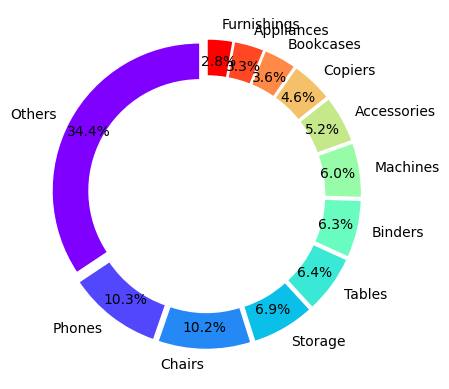

In [623]:
cmap = plt.cm.rainbow  # Choose a colormap (e.g., tab20, viridis, etc.)
colors = cmap(np.linspace(0, 1, len(product_wise_revenue)))

plt.pie(product_wise_revenue, labels=product_wise_revenue.index, autopct ='%1.1f%%', 
        explode= (0.05, 0.05, 0.05,0.05,0.05, 0.05, 0.05,0.05,0.05, 0.05, 0.05, 0.05),
        colors=colors, wedgeprops=dict(width=.25, edgecolor='w'),radius=1, pctdistance=0.85,startangle=90,)
plt.show()